In [63]:
import tensorflow 
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator

In [96]:
#assigning train data directory
train_data_dir='/content/drive/MyDrive/DL notebook verzeo/data/train' 
datagen = ImageDataGenerator(rescale = 1./255)# Normalize

train_generator = datagen.flow_from_directory(directory=train_data_dir, 
                                              classes=['dogs','cats'],
                                              target_size=(224, 224), 
                                              # class_mode='binary',
                                              color_mode="rgb",
                                              batch_size=32)
#validaion data directory
valid_data_dir='/content/drive/MyDrive/DL notebook verzeo/data/validation' 
datagen = ImageDataGenerator(rescale = 1./255)# Normalize

valid_generator = datagen.flow_from_directory(directory=valid_data_dir, 
                                              classes=['dogs','cats'], 
                                              target_size=(224, 224),
                                              # class_mode='binary',                       
                                              color_mode="rgb", 
                                              batch_size=32)

test_data_dir='/content/drive/MyDrive/DL notebook verzeo/data/test'
datagen = ImageDataGenerator(rescale=1./255)#normalize
test_generator = datagen.flow_from_directory( test_data_dir,
                                             classes=['dogs','cats'],
                                            #  class_mode='binary',
                                              target_size=(224, 224),
                                              color_mode="rgb",
                                              batch_size=5,
                                              )


Found 2048 images belonging to 2 classes.
Found 832 images belonging to 2 classes.
Found 3 images belonging to 2 classes.


In [60]:
from tensorflow import keras
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dropout
cnn = keras.Sequential()
cnn.add(Conv2D(32,(3,3),activation='relu'))   #adding 32(3X3 filters)
cnn.add(MaxPooling2D((2,2)))  #2x2 window size

cnn.add(Conv2D(64,(3,3),activation='relu'))   #adding 64(3X3 filters)
cnn.add(MaxPooling2D((2,2)))  #2x2 window size

cnn.add(Conv2D(128,(3,3),activation='relu'))   #adding 128(3X3 filters)
cnn.add(MaxPooling2D((2,2)))  #2x2 window size

# cnn.add(Conv2D(256,(3,3),activation='relu'))   #adding 128(3X3 filters)
# cnn.add(MaxPooling2D((2,2)))  #2x2 window size

# cnn.add(Conv2D(512,(3,3),activation='relu'))   #adding 128(3X3 filters)
# cnn.add(MaxPooling2D((2,2)))  #2x2 window size

# cnn.add(Conv2D(1024,(3,3),activation='relu'))   #adding 128(3X3 filters)
# cnn.add(MaxPooling2D((2,2)))  #2x2 window size


cnn.add(Flatten())  #96 input neurons
cnn.add(Dense(32, activation='relu', kernel_initializer='he_uniform'))
cnn.add(Dropout(0.5))
cnn.add(Dense(2, activation='sigmoid'))

In [ ]:
#train
from tensorflow.keras.optimizers import SGD
opt = SGD(lr=0.001, momentum=0.9)
cnn.compile(optimizer=opt, loss='categorical_crossentropy',metrics=['accuracy'])
history = cnn.fit_generator(generator=train_generator,            
                            validation_data=valid_generator,                            
                            epochs=)

In [54]:
#save model
cnn.save('cats_and_dogs.hdf5')

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:2006: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '
/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


[0 0 1]


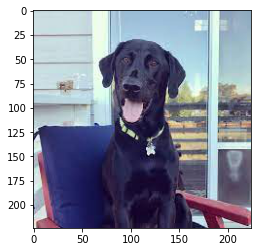

In [102]:
#evaluate
cnn.evaluate_generator(generator=valid_generator)
#predict 
import numpy as np
from matplotlib import pyplot as plt
pred=cnn.predict_generator(test_generator)
predicted_class_indices=np.argmax(pred,axis=1)
print(predicted_class_indices)

x,y = test_generator.next()
for i in range(len(predicted_class_indices)):
    image = x[i]
    plt.imshow(image)


In [103]:
labels = (train_generator.class_indices)
labels = dict((v,k) for k,v in labels.items())
predictions = [labels[k] for k in predicted_class_indices]
predictions

['dogs', 'dogs', 'cats']

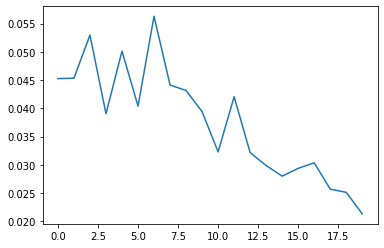

In [43]:
from matplotlib import pyplot as plt
plt.plot(history.history['loss'])

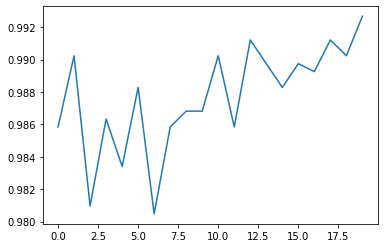

In [44]:
plt.plot(history.history['accuracy'])